In [1]:
import sys
import delivery_driver as dd
sys.path.append("../../deliveryrobot")
from utilities.utilities import *
from kinematics.movementai import *
import time
import math

In [2]:
start_time = time.time()
robot = dd.DeliveryRobot()
print(f"Robot setup complete in {time.time()-start_time} seconds")

target = math.pi/4

Robot setup complete in 0.901726484298706 seconds


distances 0.0 0.0 over 0
orientation 0.0 over 0

- - - - - - - - - - -

Time since last call: 0
Steering: [0.00371226 0.0033495 ] -1.8726209383146397e-06
Position: [ 9.99199862e-01 -9.34713270e-04]
Orientation: 0.8628090227413137
Velocity: [0.00427587 0.00421952]
Rotation Vel: 1.69671540373173e-06
Added data point: time=1721238037.884171, position=[ 9.99199862e-01 -9.34713270e-04], orientation=0.8628090227413137, velocity=[0.00427587 0.00421952], angular_velocity=1.69671540373173e-06, acceleration=[0.00371226 0.0033495 ], angular_acceleration=-1.8726209383146397e-06
[0.25, 0.0, 0.0]
steering [-9.99999222e-03  1.24761441e-05] 0.1
0.0042319955509975285 > 0.015
chosen velocities [0.       0.004232]
omega 0.1
wheel velocities -0.028016070499577626 0.15741531616919274
distances 0.0028180491682496273 0.003682650881775059 over 0.0712587833404541
orientation 0.10962889744685247 over 0.0712587833404541

- - - - - - - - - - -

Time since last call: 0.0712587833404541
Steering: [-9.99999222e-03  

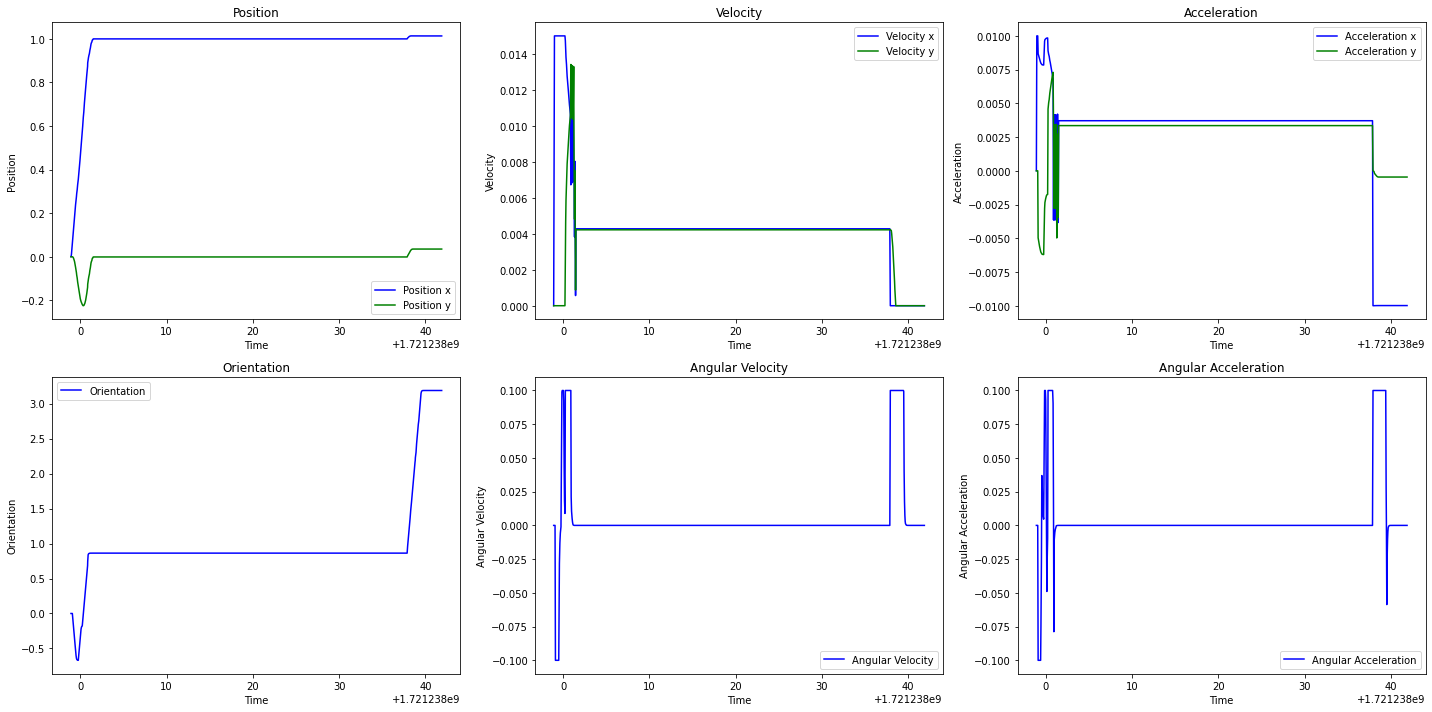

In [5]:
# set desired move information
goal_state = [1., 0.0, 0.0]
path = [
    (  0, [0.00,  0.00, 0.00]),
    (  1, [0.25,  0.00, 0.00]),
    ( 14, [0.50, -0.25, 0.00]),
    ( 65, [0.75, -0.25, 0.00]),
    (100, [1.00,  0.00, 0.00])
]
robot.update_path_ai(path)

# setup time variables
goal_time = 1
call_time = 0
total_time = 0
start_time = time.time()
last_call = time.time()

while robot.path_follow_ai(goal_time, call_time):
    
    # get time it took to make the call
    last_call = time.time()
    call_time = last_call - start_time
    total_time+=call_time
    
    # set a new start time
    start_time = time.time()
    
    # testing pause
    time.sleep(0.25)
    
    
    if total_time > 4:
        robot.robot.stop()
        
        break

robot.target_ai.slam_update(goal_state)
print(f"targeting {goal_state} from {robot.robot_ai.position}")

while robot.arrive_ai(goal_time, call_time):
    
    # get time it took to make the call
    last_call = time.time()
    call_time = last_call - start_time
    total_time+=call_time
    
    # set a new start time
    start_time = time.time()
    
    if total_time > 4:
        robot.robot.stop()
        break

robot.robot.stop()
robot.robot_ai.kplot.plot_data()
target += math.pi/4

# 

In [4]:
robot.robot.stop()